# Clustering

### Import

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

sns.set()
%matplotlib inline

In [3]:
# pickleで読込む
import pickle

# 前処理済みデータ取得
with open(".../data/dataset/pre_data.pickle",'rb') as f:
    pre_data = pickle.load(f)

In [4]:
pre_data=pre_data.fillna(pre_data.mean())

#### 分割

In [5]:
# 目的変数と説明変数の取得
y=pre_data['LoanStatus']
X=pre_data.drop(columns='LoanStatus')

In [8]:
# 訓練データとテストデータの分割
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=True)

# 訓練データと検証データの分割
train_X, valid_X, train_y, valid_y = train_test_split(train_X, train_y, test_size=0.2, shuffle=True)

### Clustering

In [9]:
# クラスター数の設定
kmeans = KMeans(2)

In [25]:
kmeans.fit(train_X)

KMeans(n_clusters=2)

### Clustering results

予測したクラスターを返す<br>
sklearn.cluster.KMeans.fit_predict(x)

In [12]:
identified_clusters = kmeans.fit_predict(X)

In [13]:
identified_clusters

array([0, 0, 1, ..., 0, 0, 0])

In [15]:
data_with_cluster = pre_data.copy()
data_with_cluster['Cluster'] =identified_clusters
data_with_cluster

,LoanStatus,Term,Approval_Y,Approval_M,Disbursement_Y,Disbursement_M,TermFlg,RevLineCr,LowLoan,LoanAmount,BalanceGross,SystemCode,Employees,ExistNew,CreateJob,FranchiseCode,Zip,BankState,UrbanRural,Cluster
0,0,84,1996,9,1996.0,12.0,0,0,1,100000.0,0.0,621320,6,0.0,0,0,75601,0,0,0
1,0,26,2004,2,2004.0,3.0,1,2,1,35000.0,0.0,541511,1,0.0,0,0,83814,0,1,0
2,0,180,1995,4,1995.0,7.0,0,1,1,110000.0,0.0,0,2,0.0,0,0,59868,0,0,1
3,0,84,2004,7,2004.0,8.0,0,0,1,100000.0,0.0,561622,6,0.0,0,0,3055,0,1,0
4,0,60,2005,8,2005.0,11.0,0,0,1,50000.0,0.0,484110,1,0.0,0,0,39429,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255472,1,49,2008,4,2008.0,4.0,1,2,1,15000.0,0.0,452990,2,0.0,0,0,98501,0,1,0
255473,0,240,2001,3,2001.0,6.0,0,0,1,181000.0,0.0,531210,2,0.0,1,0,91006,0,1,0
255474,0,84,2005,4,2005.0,4.0,0,0,1,5000.0,0.0,421450,3,1.0,0,0,77061,0,1,0
255475,0,180,1994,9,1994.0,10.0,0,1,1,146000.0,0.0,621320,4,0.0,0,0,92703,0,0,0


<AxesSubplot:xlabel='Approval_Y', ylabel='TermFlg'>

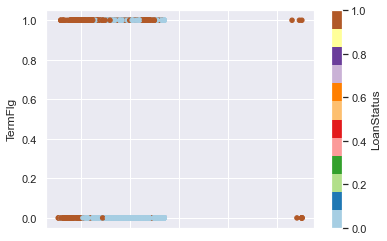

In [23]:
data_with_cluster.plot.scatter(x='Approval_Y', y='TermFlg',c='LoanStatus',cmap="Paired")

### Clustering results

予測したクラスターを返す<br>
sklearn.cluster.KMeans.fit_predict(x)

In [199]:
identified_clusters = kmeans.fit_predict(x)

In [200]:
identified_clusters

array([1, 1, 0, 1, 0, 1])

In [201]:
data_with_cluster =data_mapped.copy()
data_with_cluster['Cluster'] =identified_clusters
data_with_cluster

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


c:\users\sirec\anaconda3\envs\datascience\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\sirec\anaconda3\envs\datascience\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\sirec\anaconda3\envs\datascience\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:\users\sirec\anaconda3\envs\datascience\lib\s

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

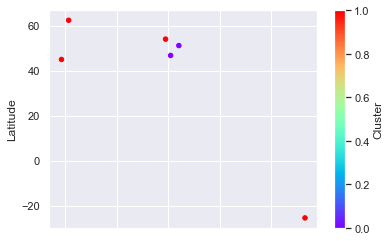

In [202]:
data_with_cluster.plot.scatter(x='Longitude', y='Latitude',c='Cluster',cmap="rainbow")

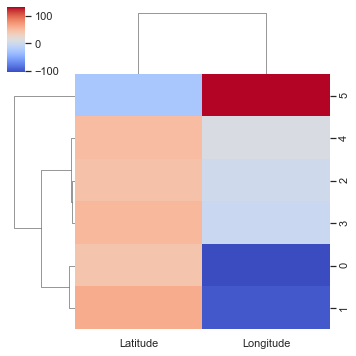

In [229]:
sns.clustermap(x,figsize=(5,5),cmap="coolwarm")

## ElbowMethod

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

sns.set()
%matplotlib inline

### Load the data

In [213]:
data = pd.read_csv("./data/Country clusters.csv")

### Select the features

In [214]:
x = data[['Latitude','Longitude']]

In [215]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


#### WCSS  
クラスタの二乗和内  
クラスタの結合を測定

In [216]:
kmeans.inertia_

0.0

In [217]:
# WCSSの決定状況を確認する
wcss=[]

for i in range(1,7):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

wcss

[42601.91356666667,
 13205.758119999999,
 288.10523333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

### The Elbow Method

Text(0, 0.5, 'Within_cluster sum of squares')

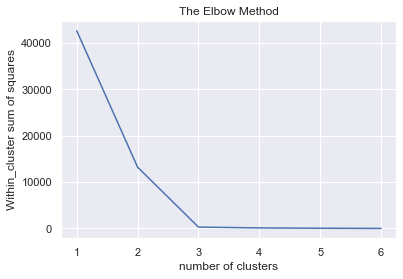

In [218]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('Within_cluster sum of squares')

## 標準化

特徴量として残しておきたい場合は標準化しないこともある。<br>
クラスタリングするにあたり、x軸・y軸が同等の価値があるのであれば標準化すべき。

平均０、分散１のスケールに変換
> sklearn.preprocessing.scale(x)

In [220]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[ 0.20434388, -1.19311447],
       [ 0.79812779, -1.10487004],
       [ 0.26498274,  0.15106214],
       [ 0.51230754,  0.08864535],
       [ 0.41487656,  0.25234699],
       [-2.19463851,  1.80593003]])

kを求める

In [221]:
# WCSSの決定状況を確認する
wcss=[]

for i in range(1,7):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

wcss

[42601.91356666667,
 13205.758119999999,
 288.10523333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

#### 次元削減

In [ ]:
# 次元削減
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,random_state=0)
x =tsne.fit_transform(store_clustering_sc)
tsne_df = pd.DataFrame(x)
tsne_df['cluster'] =store_clustering['cluster']
tsne_df.columns = ['axis_0','axis_1','cluster']

tsne_graph = sns.scatterplot(x='axis_0',y='axis_1',hue='cluster',data=tsne_df)

In [ ]:
# クラスタリング
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

data_clustering = analize_order_data.groupby('data_id').agg(['size','mean','median','max','min'])['total_amount']
data_clustering.reset_index(inplace = True,drop=True)

# features
features_x = data_clustering[['size','mean','median','max','min']]

# 標準化
sc = StandardScaler()
store_clustering_sc = sc.fit_transform(store_clustering)

# クラスターの数を決定
n_clusters =4

# WCSSの決定状況を確認する
wcss=[]
number_clusters = range(1,n_clusters)
for i in number_clusters:
    kmeans=KMeans(i)
    kmeans.fit(features_x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('Within_cluster sum of squares')
plt.show()

# KMeans
kmeans = KMeans(n_clusters=n_clusters ,random_state=0)
clusters = kmeans.fit(data_clustering_sc)
data_clustering['cluster']=clusters.labels_

print(data_clustering['cluster'].unique())
print(f'wcss : {wcss}')

data_clustering.head()

# 次元削減
tsne = TSNE(n_components=2,random_state=0)
x =tsne.fit_transform(data_clustering_sc)
tsne_df = pd.DataFrame(x)
tsne_df['cluster'] =data_clustering['cluster']
tsne_df.columns = ['axis_0','axis_1','cluster']

tsne_graph = sns.scatterplot(x='axis_0',y='axis_1',hue='cluster',data=tsne_df)

In [ ]:
# dump pre_data
filepath="../data/dataset/"
filename="pre_data.pickle"
dump_data=pre_data

with open(filepath + filename,'wb') as f:
    pickle.dump(dump_data,f)